In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn import cluster

In [10]:
# 产生分隔的高斯分布的聚类簇 样本分布见 6-1
# centers 核心点的数组
# num 样本数
# std 每簇的标准差
def create_data(centers,num=1000,std=0.7):
    x, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return x, labels_true

In [11]:
def test_Kmeans(*data):
    x,labels_true = data
    km = cluster.KMeans()
    km.fit(x)
    predicted_labels = km.predict(x)
    print('ARI:{0}'.format(adjusted_rand_score(labels_true,predicted_labels))) #ARI 可以理解为聚类效果 越大越好
    print('Sum center distance {0}'.format(km.inertia_)) # 每个样本距离中心的距离的和 越小越好

In [12]:
x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_Kmeans(x, labels_true)

ARI:0.38523150119465516
Sum center distance 224.99523825333654


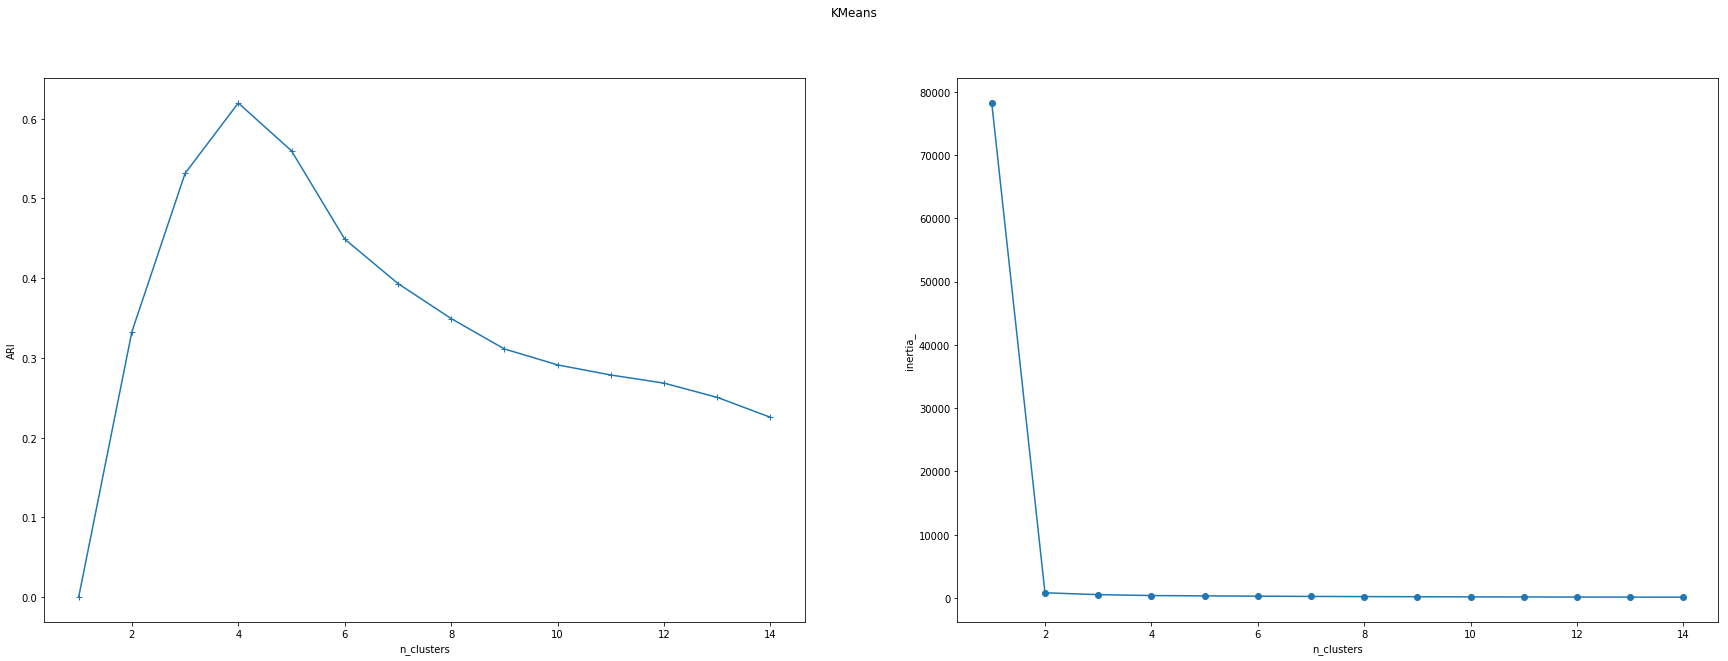

In [20]:
# 簇数的影响
def test_Kmeans_k(*data):
    x,labels_true = data
    nums = range(1,15)
    ARIs =[]
    Distances = []
    for num in nums:
        km = cluster.KMeans(n_clusters=num)
        km.fit(x)
        predicted_labels = km.predict(x)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances.append(km.inertia_)
        
    # 绘图
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(30)
    ax = fig.add_subplot(121)
    ax.plot(nums, ARIs, marker='+')
    ax.set_xlabel('n_clusters')
    ax.set_ylabel('ARI')
    ax = fig.add_subplot(122)
    ax.plot(nums, Distances, marker='o')
    ax.set_xlabel('n_clusters')
    ax.set_ylabel('inertia_')
    fig.suptitle('KMeans')
    plt.show()

x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_Kmeans_k(x, labels_true)

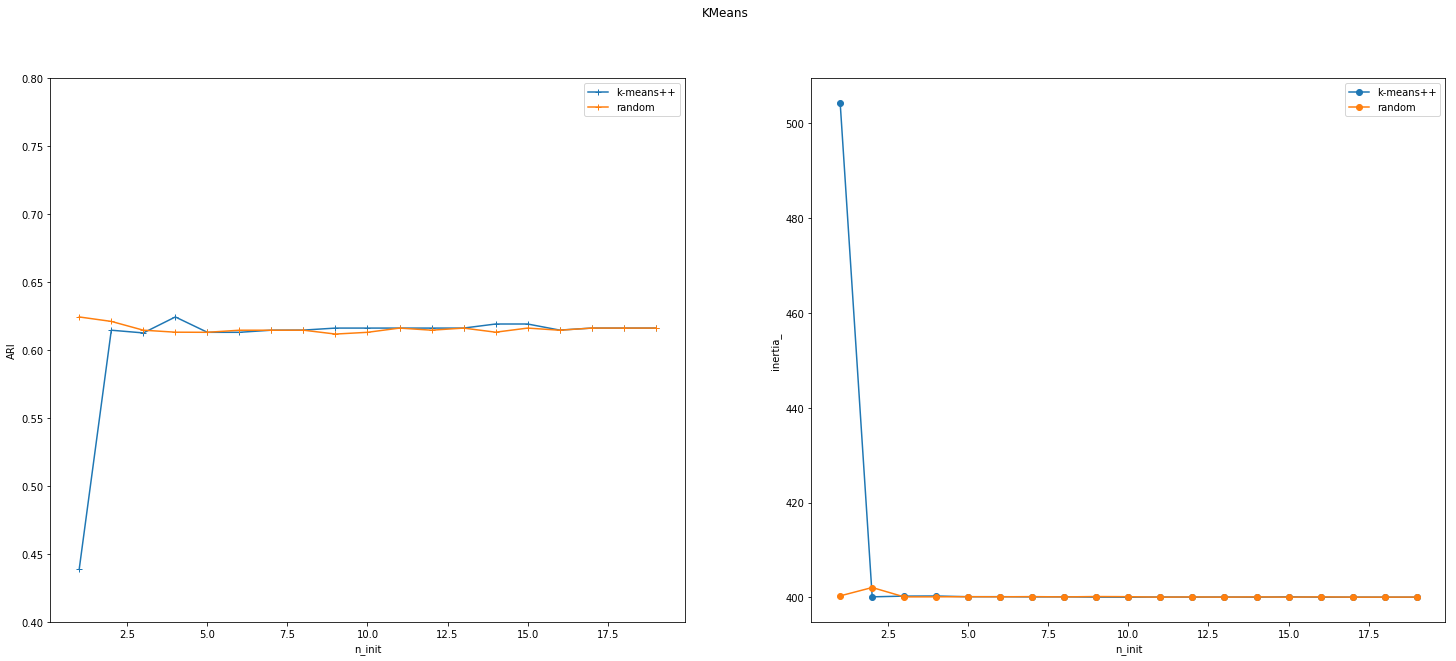

In [25]:
# 运行次数 以及 初始中心向量策略的影响
def test_Kmeans_n_init(*data):
    x,labels_true = data
    nums = range(1,20)
    # 绘图
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(25)
    
    ARIs_k =[]
    Distances_k = []
    
    ARIs_r =[]
    Distances_r = []
    for num in nums:
        km = cluster.KMeans(n_clusters=4, n_init=num, init='k-means++')
        km.fit(x)
        predicted_labels = km.predict(x)
        ARIs_k.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances_k.append(km.inertia_)
        
        km = cluster.KMeans(n_clusters=4, n_init=num, init='random')
        km.fit(x)
        predicted_labels = km.predict(x)
        ARIs_r.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances_r.append(km.inertia_)
        

    ax = fig.add_subplot(121)
    ax.plot(nums, ARIs_k, marker='+', label='k-means++')
    ax.plot(nums, ARIs_r, marker='+', label='random')
    ax.set_xlabel('n_init')
    ax.set_ylabel('ARI')
    ax.set_ylim(0.4,0.8)
    ax.legend(loc='best')
    ax = fig.add_subplot(122)
    ax.plot(nums, Distances_k, marker='o', label='k-means++')
    ax.plot(nums, Distances_r, marker='o', label='random')
    ax.set_xlabel('n_init')
    ax.set_ylabel('inertia_')
    ax.legend(loc='best')
    fig.suptitle('KMeans')
    plt.show()

x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_Kmeans_n_init(x, labels_true)